In [ ]:
!pip install ipywidgets matplotlib pandas --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


Button(button_style='success', description='Registrar toma', style=ButtonStyle())

Button(button_style='primary', description='Guardar historial', style=ButtonStyle())


🧑 Paciente: Hugo Julian Díaz | ID: 183268
🩺 Toma registrada: 98.0% SpO₂ | 70 BPM | Estado: Normal (95% - 100%)


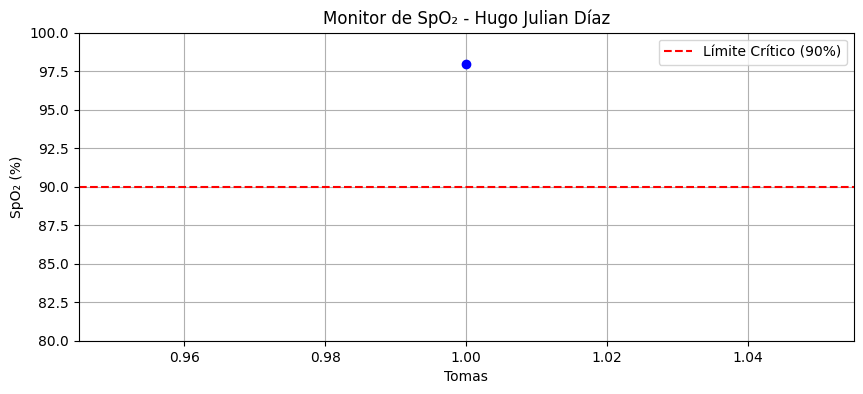


📝 Historial de tomas:
Toma 1 | 2025-04-13 04:06:08 | SpO₂: 98.0% | BPM: 70 | Estado: Normal (95% - 100%)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from IPython.display import display, clear_output
import ipywidgets as widgets

# Diccionario para almacenar los registros por paciente
registros_pacientes = {}

# Clasificación del nivel de oxígeno
def determinar_rango_spo2(spo2):
    if spo2 >= 95:
        return "Normal (95% - 100%)", 'green'
    elif 90 <= spo2 < 95:
        return "Levemente baja (90% - 94%)", 'orange'
    else:
        return "Baja (< 90%)", 'red'

# Función para graficar las tomas de SpO2
def graficar_registros(registros, nombre):
    spo2_vals = [r["SpO2 (%)"] for r in registros]
    x_vals = list(range(1, len(spo2_vals) + 1))

    plt.figure(figsize=(10, 4))
    plt.plot(x_vals, spo2_vals, marker='o', color='blue', linewidth=2)
    plt.axhline(90, color='red', linestyle='--', label='Límite Crítico (90%)')
    plt.title(f"Monitor de SpO₂ - {nombre}")
    plt.xlabel("Tomas")
    plt.ylabel("SpO₂ (%)")
    plt.grid(True)
    plt.legend()
    plt.ylim(80, 100)
    plt.show()

# Guardar en CSV por paciente
def guardar_csv(nombre_id, registros):
    df = pd.DataFrame(registros)
    archivo = f"historial_{nombre_id}.csv"
    df.to_csv(archivo, index=False)
    print(f"✅ Historial guardado en '{archivo}'.")

# Función que se ejecuta al registrar una toma
def registrar_toma(btn):
    nombre = nombre_input.value.strip()
    cedula = cedula_input.value.strip()
    spo2 = float(spo2_input.value)
    bpm = int(bpm_input.value)
    fecha = datetime.now().strftime("%Y-%m-%d")
    hora = datetime.now().strftime("%H:%M:%S")
    estado, color = determinar_rango_spo2(spo2)

    if not nombre or not cedula:
        print("⚠️ Por favor completa el nombre y la cédula del paciente.")
        return

    nombre_id = f"{nombre.replace(' ', '_')}_{cedula}"

    if nombre_id not in registros_pacientes:
        registros_pacientes[nombre_id] = []

    registros_pacientes[nombre_id].append({
        "Paciente": nombre,
        "ID": cedula,
        "Fecha": fecha,
        "Hora": hora,
        "SpO2 (%)": spo2,
        "BPM": bpm,
        "Estado": estado
    })

    # Limpiar y mostrar interfaz
    clear_output(wait=True)
    display(ui, btn_registrar, btn_guardar)

    # Mostrar confirmación
    print(f"\n🧑 Paciente: {nombre} | ID: {cedula}")
    print(f"🩺 Toma registrada: {spo2}% SpO₂ | {bpm} BPM | Estado: {estado}")

    # Alerta visual si SpO₂ es baja
    if spo2 < 90:
        display(widgets.HTML(f"""
        <style>
        .popup-alert {{
            position: fixed;
            top: 20%;
            left: 50%;
            transform: translate(-50%, -50%);
            background-color: #ffe6e6;
            color: #b30000;
            border: 3px solid red;
            padding: 25px;
            font-size: 18px;
            font-weight: bold;
            border-radius: 10px;
            z-index: 9999;
            text-align: center;
            box-shadow: 0 0 20px red;
        }}
        </style>
        <div class='popup-alert'>
            ⚠️ <br>
            ¡ALERTA CRÍTICA! <br>
            Saturación de oxígeno muy baja: <b>{spo2}%</b><br><br>
            <i>Notifique al médico inmediatamente.</i>
        </div>
        """))

    # Mostrar gráfica
    graficar_registros(registros_pacientes[nombre_id], nombre)

    # Mostrar historial de forma limpia
    print("\n📝 Historial de tomas:")
    for i, r in enumerate(registros_pacientes[nombre_id], 1):
        print(f"Toma {i} | {r['Fecha']} {r['Hora']} | SpO₂: {r['SpO2 (%)']}% | BPM: {r['BPM']} | Estado: {r['Estado']}")

# Función para guardar todos los historiales en CSV
def guardar_historial(btn):
    for nombre_id, registros in registros_pacientes.items():
        guardar_csv(nombre_id, registros)

# Crear elementos de la interfaz
nombre_input = widgets.Text(description="Nombre:")
cedula_input = widgets.Text(description="ID:")
spo2_input = widgets.BoundedFloatText(description="SpO₂ %:", min=50, max=100, value=98)
bpm_input = widgets.BoundedIntText(description="BPM:", min=30, max=200, value=70)

btn_registrar = widgets.Button(description="Registrar toma", button_style="success")
btn_registrar.on_click(registrar_toma)

btn_guardar = widgets.Button(description="Guardar historial", button_style="primary")
btn_guardar.on_click(guardar_historial)

# Mostrar interfaz
ui = widgets.VBox([nombre_input, cedula_input, spo2_input, bpm_input])
display(ui, btn_registrar, btn_guardar)
